In [4]:
import tensorflow as tf 
import numpy as np
import matplotlib.pyplot as plt


In [3]:
# Load the MNIST dataset from tensorflow.keras.datasets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Reshape the images to a 1D vector of 784 pixels (28x28)
x_train = x_train.reshape(-1, 784).astype('float32') / 255
x_test = x_test.reshape(-1, 784).astype('float32') / 255

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [5]:
x_train.shape

(60000, 784)

In [10]:
model_tf =tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(784,)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')
])
model_tf.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history_tf = model_tf.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)



c:\Users\sayed\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8656 - loss: 0.4770 - val_accuracy: 0.9561 - val_loss: 0.1541
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9612 - loss: 0.1334 - val_accuracy: 0.9643 - val_loss: 0.1179
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9754 - loss: 0.0880 - val_accuracy: 0.9680 - val_loss: 0.1088
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9814 - loss: 0.0644 - val_accuracy: 0.9702 - val_loss: 0.1039
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9850 - loss: 0.0482 - val_accuracy: 0.9729 - val_loss: 0.0949
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0357 - val_accuracy: 0.9741 - val_loss: 0.0899
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9925 - loss: 0.0272 - val_accuracy: 0.9742 - val_loss: 0.0934
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9935 - loss: 0.0220 - 

In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model_tf.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9750 - loss: 0.0946
Test accuracy: 0.9776


In [12]:
# Get the model's predictions for the test set
predictions = model_tf.predict(x_test)

# Convert the predictions from probabilities to labels (argmax to get the index of max probability)
predicted_labels_tf = np.argmax(predictions, axis=1)

# The actual labels are in y_test (since they are one-hot encoded, we need to convert them back to labels)
actual_labels_tf = np.argmax(y_test, axis=1)

# Print the first 5 predictions and actual labels
for i in range(5):
    print(f"Sample {i+1}: Prediction label = {predicted_labels_tf[i]}, Actual label = {actual_labels_tf[i]}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Sample 1: Prediction label = 7, Actual label = 7
Sample 2: Prediction label = 2, Actual label = 2
Sample 3: Prediction label = 1, Actual label = 1
Sample 4: Prediction label = 0, Actual label = 0
Sample 5: Prediction label = 4, Actual label = 4


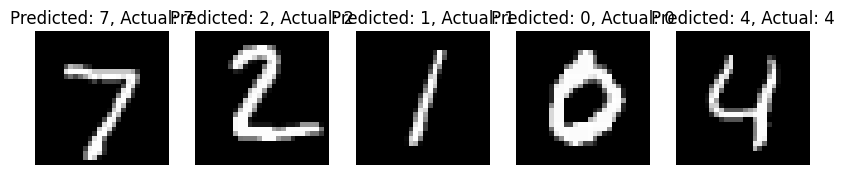

In [13]:
# Visualization
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')  # Reshape the flattened image back to 28x28
    plt.title(f"Predicted: {predicted_labels_tf[i]}, Actual: {actual_labels_tf[i]}")
    plt.axis('off')  # Turn off axis for cleaner visualization
plt.show()  

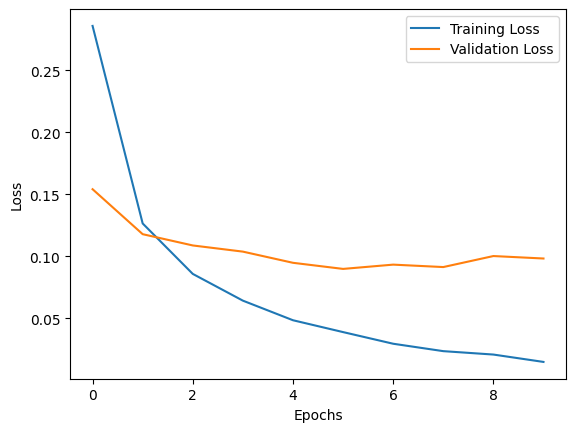

In [16]:
plt.plot(history_tf.history['loss'], label='Training Loss')
plt.plot(history_tf.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()